# Principio de EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Cargar los datos
df = pd.read_csv('../Data/costo_operacional_vehiculos_clean.csv')

 Se define una función para clasificar los vehículos en tres categorías: Convencional, Eléctrico e Híbrido, basándose en el tipo de combustible (Fuel_Type). Esta categorización facilita la comparación entre los diferentes tipos de vehículos.

In [2]:
# Función para categorizar los vehículos
def categorize_vehicle(row):
    if row['Fuel_Type'] in ['Diesel', 'Petrol', 'Petrol/LPG']:
        return 'Convencional'
    elif row['Fuel_Type'] == 'Electricity':
        return 'Eléctrico'
    else:
        return 'Híbrido'

# Aplicar la función al dataframe
df['Vehicle_Type'] = df.apply(categorize_vehicle, axis=1)

# Verificar la distribución
print(df['Vehicle_Type'].value_counts())


Vehicle_Type
Convencional    2710
Híbrido          884
Eléctrico        219
Name: count, dtype: int64


Se muestra la cantidad de vehículos en cada categoría. Este paso es crucial para entender la representación de cada tipo de vehículo en el dataset.

             Fuel_Cost                                                    \
                 count         mean         std         min          25%   
Vehicle_Type                                                               
Convencional    2710.0  1573.522403  468.470496  880.477090  1268.334845   
Eléctrico        219.0     0.000000    0.000000    0.000000     0.000000   
Híbrido          884.0  1143.207884  454.081982  107.160699   988.437496   

                                                    Electric_Cost              \
                      50%          75%          max         count        mean   
Vehicle_Type                                                                    
Convencional  1418.679707  1714.571191  3589.083724        2710.0    0.000000   
Eléctrico        0.000000     0.000000     0.000000         219.0  634.623876   
Híbrido       1138.782358  1313.118421  2879.743870         884.0  103.979061   

              ...   Total_Cost              Noise_Level 

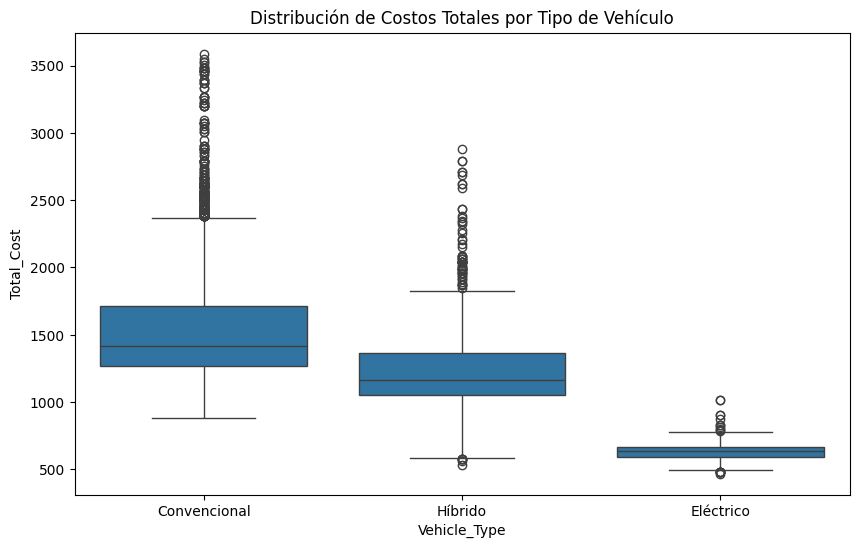

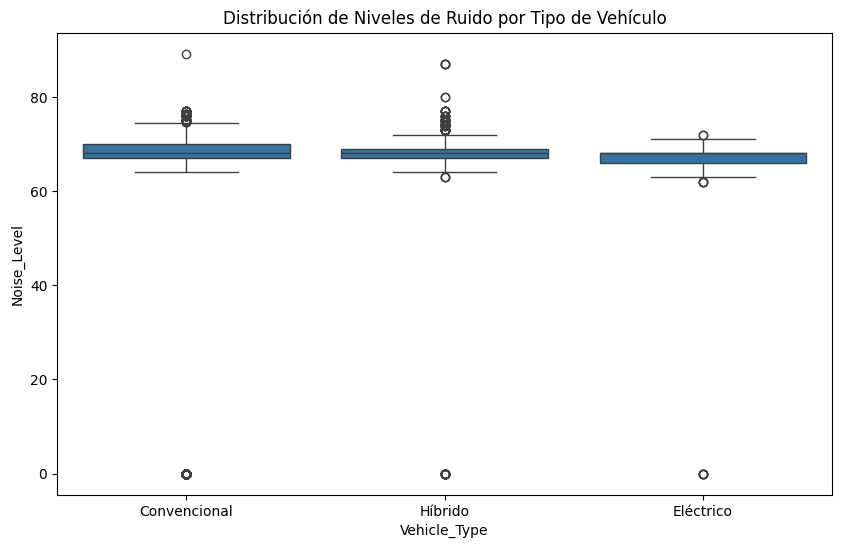

In [3]:
# Resumen estadístico
summary = df.groupby('Vehicle_Type')[['Fuel_Cost', 'Electric_Cost', 'Total_Cost', 'Noise_Level']].describe()
print(summary)

# Boxplot para comparar costos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Total_Cost', data=df)
plt.title('Distribución de Costos Totales por Tipo de Vehículo')
plt.show()

# Boxplot para comparar niveles de ruido
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Noise_Level', data=df)
plt.title('Distribución de Niveles de Ruido por Tipo de Vehículo')
plt.show()


In [4]:
# Sumar costos por tipo de vehículo
total_cost_conventional = df[df['Vehicle_Type'] == 'Convencional']['Total_Cost'].sum()
total_cost_electric_hybrid = df[df['Vehicle_Type'].isin(['Eléctrico', 'Híbrido'])]['Total_Cost'].sum()

# Calcular el KPI
kpi = (total_cost_electric_hybrid / total_cost_conventional) * 100
print(f"KPI: {kpi:.2f}% de reducción de costos operativos al usar vehículos eléctricos o híbridos.")


KPI: 29.11% de reducción de costos operativos al usar vehículos eléctricos o híbridos.


In [5]:
# Calcular promedio y desviación estándar de los niveles de ruido
noise_summary = df.groupby('Vehicle_Type')['Noise_Level'].agg(['mean', 'std'])
print(noise_summary)

# Gráfico de barras para comparar niveles de ruido
plt.figure(figsize=(10, 6))
# Extraer los valores de la desviación estándar en una lista
std_values = noise_summary['std'].values


                   mean        std
Vehicle_Type                      
Convencional  63.649373  18.499019
Eléctrico     65.680365  10.305807
Híbrido       66.514932  11.430574


<Figure size 1000x600 with 0 Axes>

                   mean        std
Vehicle_Type                      
Convencional  63.649373  18.499019
Eléctrico     65.680365  10.305807
Híbrido       66.514932  11.430574


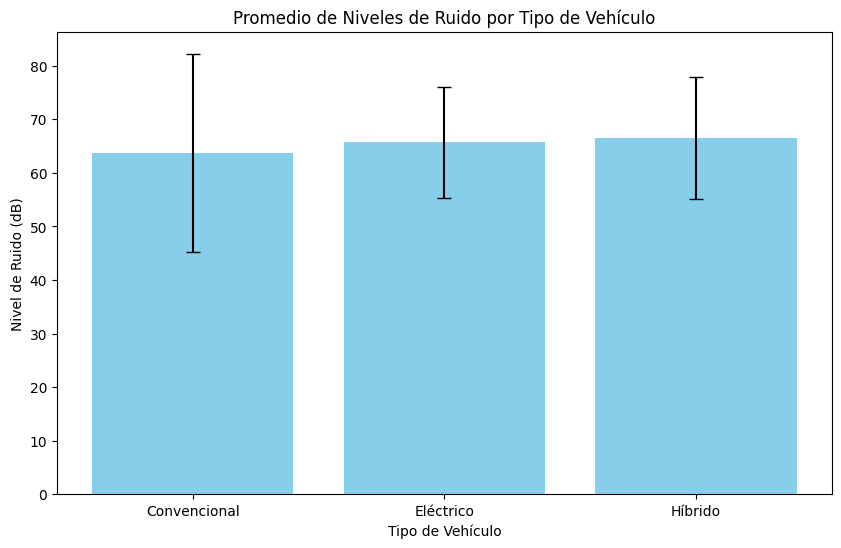

In [6]:
import matplotlib.pyplot as plt

# Calcular promedio y desviación estándar de los niveles de ruido
noise_summary = df.groupby('Vehicle_Type')['Noise_Level'].agg(['mean', 'std'])
print(noise_summary)

# Gráfico de barras para comparar niveles de ruido
plt.figure(figsize=(10, 6))
plt.bar(noise_summary.index, noise_summary['mean'], yerr=std_values, capsize=5, color='skyblue')

# Agregar títulos y etiquetas
plt.title('Promedio de Niveles de Ruido por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Nivel de Ruido (dB)')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()


C:\Users\Familia\AppData\Local\Temp\ipykernel_25288\1784534667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle_Type', y='Fuel_Cost', data=df, palette='Blues')


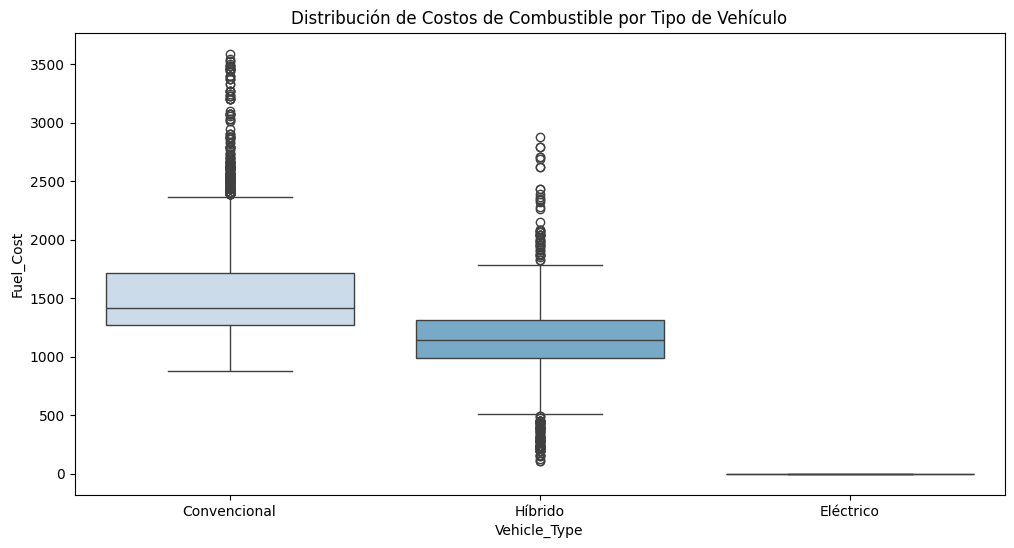

C:\Users\Familia\AppData\Local\Temp\ipykernel_25288\1784534667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle_Type', y='Electric_Cost', data=df, palette='Greens')


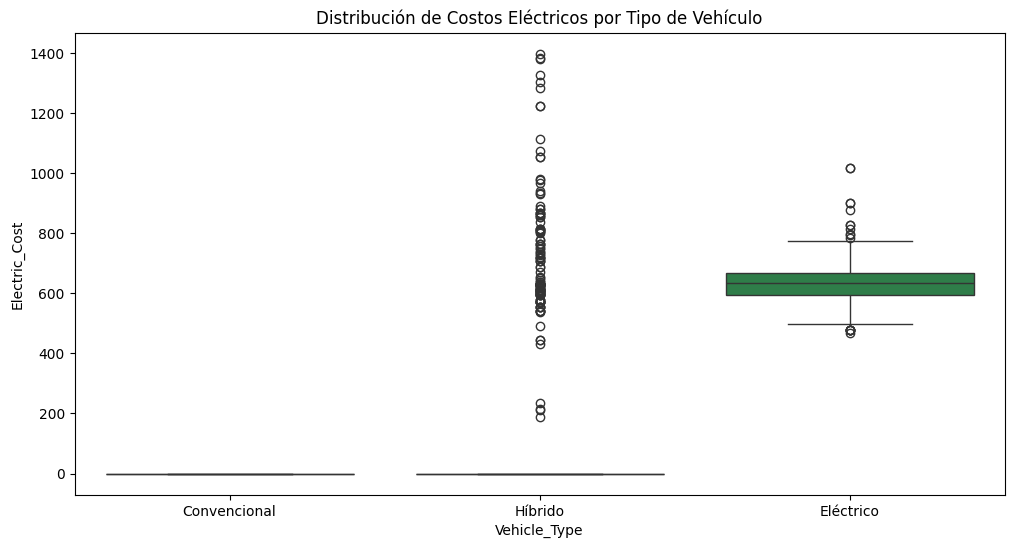

In [7]:
# Comparar costos de combustible y eléctricos por tipo de vehículo
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle_Type', y='Fuel_Cost', data=df, palette='Blues')
plt.title('Distribución de Costos de Combustible por Tipo de Vehículo')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle_Type', y='Electric_Cost', data=df, palette='Greens')
plt.title('Distribución de Costos Eléctricos por Tipo de Vehículo')
plt.show()


Correlación entre Costos y Niveles de ruido

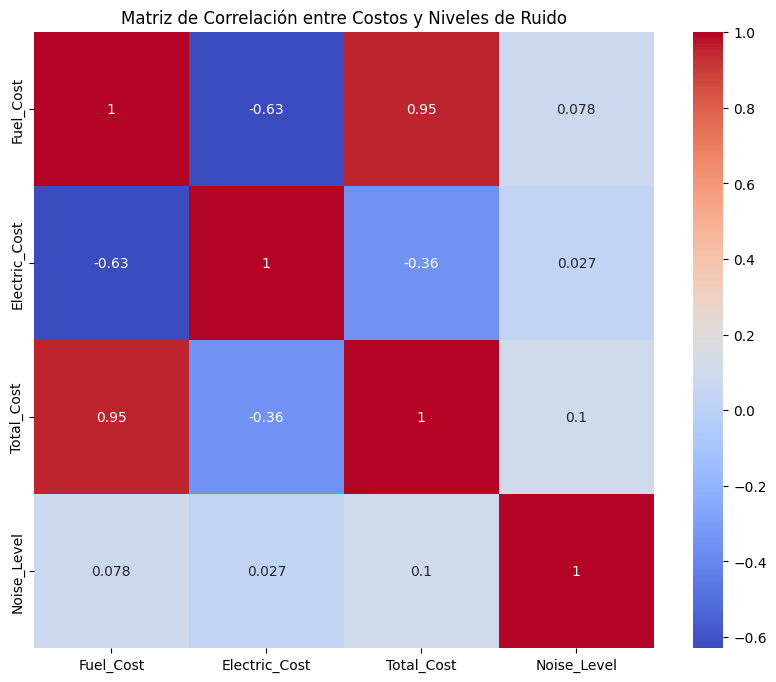

In [8]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
corr = df[['Fuel_Cost', 'Electric_Cost', 'Total_Cost', 'Noise_Level']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Costos y Niveles de Ruido')
plt.show()

Comparación de la Distribución de los Vehículos:
Investiga cómo se distribuyen los tipos de vehículos en términos de costos y rendimiento.

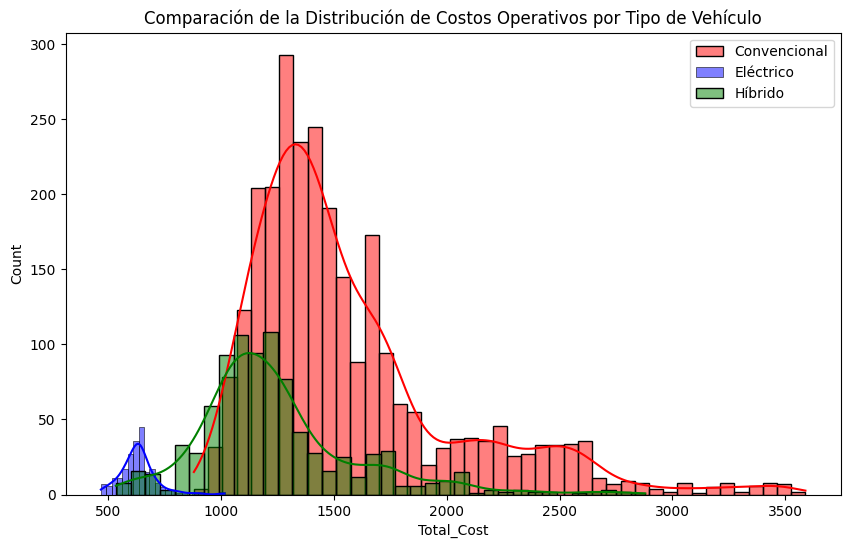

In [9]:
# Comparación de la distribución
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Vehicle_Type'] == 'Convencional']['Total_Cost'], color='red', kde=True, label='Convencional')
sns.histplot(df[df['Vehicle_Type'] == 'Eléctrico']['Total_Cost'], color='blue', kde=True, label='Eléctrico')
sns.histplot(df[df['Vehicle_Type'] == 'Híbrido']['Total_Cost'], color='green', kde=True, label='Híbrido')
plt.title('Comparación de la Distribución de Costos Operativos por Tipo de Vehículo')
plt.legend()
plt.show()


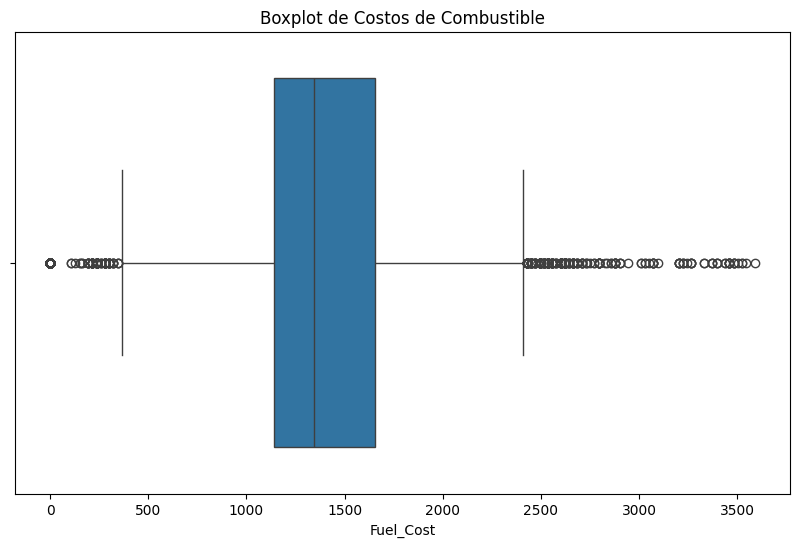

                     Manuf                    Model  \
63              ALFA ROMEO             Stelvio MY21   
90    ASTON MARTIN LAGONDA              DB11 2021MY   
93    ASTON MARTIN LAGONDA  DBS Superleggera 2021MY   
94    ASTON MARTIN LAGONDA  DBS Superleggera 2021MY   
95    ASTON MARTIN LAGONDA            DBX V8 MY2021   
...                    ...                      ...   
3142           Rolls Royce                  Phantom   
3143           Rolls Royce                   Wraith   
3144           Rolls Royce                   Wraith   
3145           Rolls Royce                   Wraith   
3146           Rolls Royce                   Wraith   

                                                 Desc Fuel_Type    Fuel_Cost  \
63    STELVIO QUADRIFOGLIO MY21 2.9 V6 BI-TURBO 510HP    Petrol  2535.869984   
90                   DB11 V12 AMR RWD Automatic Coupe    Petrol  2879.743870   
93                      DBS RWD Automatic Convertible    Petrol  2901.335951   
94                 

In [10]:
# Identificar outliers usando Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fuel_Cost'])
plt.title('Boxplot de Costos de Combustible')
plt.show()

# Mostrar los valores extremos
outliers = df[df['Fuel_Cost'] > df['Fuel_Cost'].quantile(0.95)]
print(outliers)


In [11]:
# Filtrar los outliers (aquellos con Fuel_Cost > 3000, por ejemplo)
outliers = df[df['Fuel_Cost'] > 3000]

# Ver el resumen estadístico de los outliers
print(outliers.describe())

# Verificar la distribución por fabricante, modelo y tipo de combustible
print(outliers['Manuf'].value_counts())
print(outliers['Model'].value_counts())
print(outliers['Fuel_Type'].value_counts())

# Analizar los años de fabricación de los vehículos con mayores costos
print(outliers['Desc'].value_counts())


         Fuel_Cost  Electric_Cost   Total_Cost  Noise_Level
count    49.000000           49.0    49.000000    49.000000
mean   3302.299104            0.0  3302.299104    70.734694
std     171.139246            0.0   171.139246     2.111038
min    3009.296358            0.0  3009.296358    67.000000
25%    3202.025675            0.0  3202.025675    70.000000
50%    3331.578162            0.0  3331.578162    70.000000
75%    3460.330943            0.0  3460.330943    72.700000
max    3589.083724            0.0  3589.083724    74.000000
Manuf
Rolls Royce             21
LAND ROVER              11
FERRARI                  5
MASERATI                 4
ASTON MARTIN LAGONDA     2
BENTLEY MOTORS           2
INEOS Automotive Ltd     2
MERCEDES-BENZ            2
Name: count, dtype: int64
Model
Range Rover, 20MY           6
Range Rover Sport, 20MY     5
Ghost                       5
Phantom                     4
Dawn                        4
Cullinan                    4
Wraith                    

In [12]:
# Comparar el costo promedio de los outliers con el costo promedio del resto de los vehículos
promedio_outliers = outliers['Total_Cost'].mean()
promedio_no_outliers = df[df['Fuel_Cost'] <= 3000]['Total_Cost'].mean()

print(f"Costo promedio de los outliers: {promedio_outliers}")
print(f"Costo promedio de los demás vehículos: {promedio_no_outliers}")

# Calcular el porcentaje del costo total que representan los outliers
total_outliers = outliers['Total_Cost'].sum()
total_vehiculos = df['Total_Cost'].sum()

impacto = (total_outliers / total_vehiculos) * 100
print(f"Impacto de los outliers en el costo total: {impacto:.2f}%")


Costo promedio de los outliers: 3302.2991044877567
Costo promedio de los demás vehículos: 1419.7445664123777
Impacto de los outliers en el costo total: 2.94%
